# COGS 118A - Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Patrick Helcl
- Vignesh Jayananth
- Rio Aguina-Kang
- Christopher Rochez
- Kai Stern

# Abstract 
We aim to build a model that predicts the price of Airbnbs in Europe using a data set from Kaggle which details the features and pricings of airbnb’s in various European countries and cities. This model would help people looking to travel quickly determine if an airbnb is fairly priced and the pricing trends of Airbnbs in general areas. The model would also help owners of Airbnbs determine prices according to their circumstances. The data used includes various statistics of airbnb features (e.g number of rooms, price, has superhost, etc). Utilizing a nested cross validation paradigm, we will be building a model that predicts the price of the airbnb. We will evaluate the model using appropriate loss functions that best suit the resulting model of our nested cross validation.

# Background

Airbnb’s rapid growth over the last 15 years has turned the company into one of the three pillars of the short term rental market, joining traditional renting and the hospitality industry.There are over 5 million Airbnbs worldwide spanning 81,000 cities and 191 countries<a name="barron"></a>[<sup>[1]</sup>](#barronnote). As Airbnb’s popularity first began to rise in the early 2010s, research on the company generally focused on its viability as a competitor in the short term rental sector and what effects the popular new accommodation sharing app would have on jobs and tourism in major cities<a name="Nguyen"></a>[<sup>[4]</sup>](#Nguyennote). Findings correlated increases in the number of Airbnb listings with small decreases in hotel revenue and increases in traditional rent rates <a name="Kerren"></a>[<sup>[2,4]</sup>](#Kerrennote). Due to the popularity of Airbnb as a product, more recent research has focused on exploring how Airbnb pricing can be used as an indicator for the health of the tourism and rental economies in cities<a name="Sans"></a>[<sup>[6]</sup>](#Sansnote). Other research has compared differing spatial distributions of Airbnbs and hotels and how this difference changes crowd size and interaction between locals and tourists in cities<a name="Perez"></a>[<sup>[3]</sup>](#Pereznote). Airbnb has a remarkable ability to capitalize on proximity to tourist attractions relative to hotels<a name="Gutierrez"></a>[<sup>[5]</sup>](#Gutierreznote).This research also developed tools to chart where cities have seen the largest tourist pressure related to Airbnb growth<a name="Gutierrez"></a>[<sup>[5]</sup>](#Gutierreznote). The project we intend to complete focuses on helping hosts and users of Airbnb determine fair pricing for lodging based on features of the homes or apartments.This service would help hosts ensure they aren’t undervaluing or overvaluing their services and give tourists the ability to evaluate whether pricing is fair when looking for an Airbnb to stay in.

# Problem Statement

The problem that we are trying to solve is the difficulty airbnb users have when trying to rent an airbnb. More specifically, there are many factors when trying to figure out which airbnb to book in an area (e.g. policies enforced, how many rooms, reading reviews, etc.). This takes a lot of time and it is very rigorous to figure out whether or not the nightly rate of the airbnb is overpriced or not. Another problem is that airbnb owners may not know what to price their airbnb. They need to make sure the price is high enough but at the same time low enough that people will rent their airbnb. Simply put, the problem is the difficulty and time it takes to accurately value an airbnb. One ML-relevant solution is to use certain features of Airbnbs and use nested cross-validation to find the best model that would accurately predict the price of a given airbnb.This would allow airbnb owners and renters to get a good estimate of what they should pay or be paid for a specific airbnb. We can measure this problem by looking at the price an airbnb is valued at. This problem can be replicated as there are several Airbnbs in several cities/countries. 

# Data

Link to our dataset on kaggle: https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset?select=Aemf1.csv

Our dataset initially has 40k observations, spanning 19 variables (columns): Name of the city, Price of Airbnb, If it is weekday or weekend, Room type, Type of Airbnb (e.g. Apartment, house etc.), Private Room, Shared Room,The Person Capacity of Airbnb, If the Airbnb host has Superhost or not, If the Airbnb has multiple rooms(2-4)rooms, Business (If the Business has more than 4 listings), Cleanliness Rating, Guest Satisfaction, Bedrooms, Distance to City Center (km), Metro Distance (km), Attraction, Normalised Attraction Restaurant, Normalised Restaurant index. These features and data may possibly change as we perform operations such as data cleaning. Each observation is a particular unit of input that belongs to a particular type of variable. Each of these variables have many data inputs, and each of these inputs is an observation. While all variables are important to consider in our dataset, some particularly critical variables are the city the airbnb is in, the price it has, whether it is a weekday or not, the guest satisfaction, and the amount of bedrooms. The categorical variables such as city and weekday or not will be one-hot encoded, and the rest of the data will remain in the numbers they came in. We will be performing one-hot encoding on some of the data, dropping some data that is unnecessary for our purposes of the testing, and perhaps re-naming some columns in order to be more efficient with our code.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

airbnb = pd.read_csv('https://raw.githubusercontent.com/COGS118A/Group023-SP23/main/Aemf1.csv')
airbnb.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


# Proposed Solution

To help alleviate the uncertainty associated with picking and pricing airbnb’s, we propose a model to meaningfully predict price listings by leveraging features (e.g. location, day, number of people) from our dataset. We will use a nested cross validation with Linear Regression, Support Vector Regression, and Regression Tree algorithms for analyzing the impact of particular features on pricing and general trends in our dataset in order to test and pick the most optimal algorithm and hyperparameters for this model. We chose these three algorithms because our goal is to have a numeric output and these are best modeled by regression algorithms.The comparison for each algorithm will be based on mean absolute error. All of our code is available to provide reproducibility of our results. Reproduced results should be based on data from the nine cities in our dataset.These cities are: Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, Paris, Rome, and Vienna. The listed price of each airbnb is one of the features of the dataset so we will use that as the benchmark with which we will compare our predictions from the test set results. 

# Evaluation Metrics

The model that gets chosen as a result of our cross validation will determine the error metric that we use to measure our models success and accuracy. One example of an error metric we might use, if a linear regression model is chosen, is the mean absolute error. We feel that the mean absolute error would be a good metric, especially relative to mean squared error, since the variance of price per night between the listings in our data set is large. Since there are many outliers in the housing market (e.g. penthouses, mansions,  beach houses) which can charge a hefty premium, we feel that the error which may occur when predicting these outlier will be greatly and overly exaggerated, thus using the mean absolute error will give a better representation of our model’s accuracy which will be more robust to outliers. 

# Preliminary results

We started off our exploratory data analysis (EDA) by identifying which columns in the data frame were numerical and which ones were categorical, in order to clean and use the proper analysis techniques on the correct columns respectively



In [2]:
airbnb.dtypes

City                            object
Price                          float64
Day                             object
Room Type                       object
Shared Room                       bool
Private Room                      bool
Person Capacity                float64
Superhost                         bool
Multiple Rooms                   int64
Business                         int64
Cleanliness Rating             float64
Guest Satisfaction             float64
Bedrooms                         int64
City Center (km)               float64
Metro Distance (km)            float64
Attraction Index               float64
Normalised Attraction Index    float64
Restraunt Index                float64
Normalised Restraunt Index     float64
dtype: object

After analyzing the different columns we were unsure how many possible values are included in the ‘day’ column so we used value_counts() to confirm that the column is binary which we later converted to 1’s and 0’s 

In [3]:
airbnb['Day'].value_counts()

Day
Weekday    20886
Weekend    20828
Name: count, dtype: int64

We used the pandas function pd.get_dummies() to one hot encode the remaining categorical columns

In [4]:
# Prep dataset for analyses with one-hot encoding
cat_columns = list(airbnb.select_dtypes(include=np.object_).columns)
onehot_airbnb = pd.get_dummies(airbnb[cat_columns], dtype=int)
onehot_airbnb

,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,0,0,0,0,0,0,0,0,1,0,1,1,0,0
41710,0,0,0,0,0,0,0,0,1,0,1,1,0,0
41711,0,0,0,0,0,0,0,0,1,0,1,1,0,0
41712,0,0,0,0,0,0,0,0,1,0,1,0,1,0


We then used a for loop to calculate the different correlation strengths between each numerical column and price. 

In [5]:
n_columns = list(airbnb.select_dtypes(include=np.number).columns)
n_columns.remove('Price')

print('Correlations among numerical columns and price\n')
[print(f"{col} Correlation value:", airbnb[col].corr(airbnb['Price'])) for col in n_columns];

Correlations among numerical columns and price

Person Capacity Correlation value: 0.17996931841431987
Multiple Rooms Correlation value: -0.055321585573484135
Business Correlation value: 0.014206065051138165
Cleanliness Rating Correlation value: 0.003986752842202851
Guest Satisfaction Correlation value: 0.016069139440297517
Bedrooms Correlation value: 0.2066871464657698
City Center (km) Correlation value: -0.05246229376857616
Metro Distance (km) Correlation value: -0.038989242008607726
Attraction Index Correlation value: 0.16878527485310715
Normalised Attraction Index Correlation value: 0.2709578155836385
Restraunt Index Correlation value: 0.11317143071298304
Normalised Restraunt Index Correlation value: 0.21938495499408844


Using the column with the greatest correlation to price (“Normalised Attraction Index”), we created a scatter plot from a sample of the data to visualize the relationship between the two variables and included the resulting plot line. 

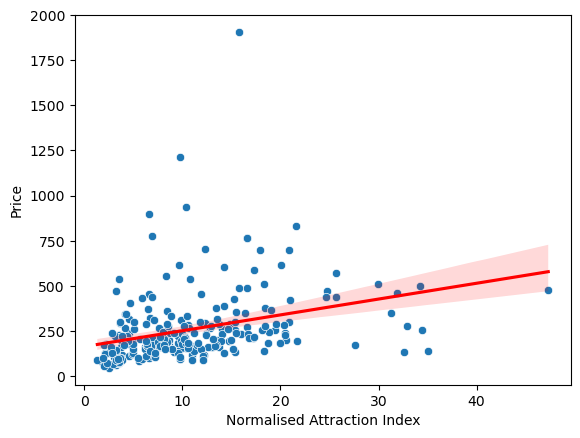

In [6]:
# Correlation Coefficient
data = airbnb.sample(250)
ax = sns.scatterplot(x='Normalised Attraction Index',
                     y='Price', data=data)
sns.regplot(x='Normalised Attraction Index', y='Price', data=data, scatter=False, ax=ax, color='r')

# Display the plot
plt.show()

In order to determine whether or not our model could be generalized to more cities across all of Europe we used a group by to find the average price of each of the 9 cities included in our data set. After looking at how different the average prices of the cities are, we determined that our model should likely only be used to predict prices of cities already included in our data set and thus we decided to keep the one hot encoded columns of our cities

In [7]:
airbnb[['City', 'Price']].groupby('City').mean()['Price']

City
Amsterdam    573.112795
Athens       151.744121
Barcelona    293.753706
Berlin       244.583752
Budapest     176.513548
Lisbon       238.210479
Paris        392.531403
Rome         205.391950
Vienna       241.582484
Name: Price, dtype: float64

Here is the final data frame we created after exploring our data and conducting the aforementioned manipulations

In [8]:
airbnbs = pd.merge(airbnb.drop(columns=cat_columns), onehot_airbnb, left_index=True, right_index=True)
airbnbs

,Price,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,...,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,194.033698,False,True,2.0,False,1,0,10.0,93.0,1,...,0,0,0,0,0,1,0,0,1,0
1,344.245776,False,True,4.0,False,0,0,8.0,85.0,1,...,0,0,0,0,0,1,0,0,1,0
2,264.101422,False,True,2.0,False,0,1,9.0,87.0,1,...,0,0,0,0,0,1,0,0,1,0
3,433.529398,False,True,4.0,False,0,1,9.0,90.0,2,...,0,0,0,0,0,1,0,0,1,0
4,485.552926,False,True,2.0,True,0,0,10.0,98.0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,715.938574,False,False,6.0,False,0,1,10.0,100.0,3,...,0,0,0,0,1,0,1,1,0,0
41710,304.793960,False,False,2.0,False,0,0,8.0,86.0,1,...,0,0,0,0,1,0,1,1,0,0
41711,637.168969,False,False,2.0,False,0,0,10.0,93.0,1,...,0,0,0,0,1,0,1,1,0,0
41712,301.054157,False,True,2.0,False,0,0,10.0,87.0,1,...,0,0,0,0,1,0,1,0,1,0


# Ethics & Privacy

Our project does not raise any glaringly obvious ethical or privacy related concerns. Air bnb is a platform in the public domain and the data set we are using is from Kaggle, another open data set platform. Since we are not gathering any personal data on the individuals that own the properties in the data set or any other personally identifiable data (hosts are anonymous in this data set), informed consent is not needed for our project and is not a concern. Using the aforementioned methods to collect the data we are using for this project, we do not have any concerns about immoral data collection methods or any personally identifiable data being used which ensures privacy of the Airbnb host’s whose listings were collected in the data set. There is potential for bias when predicting the prices of air bnb in certain locations, due to historical policies in certain communities, which may have correlated to different prices than other similarly featured listings in different areas. If these historical policies play a factor in our models prediction we will make sure to eliminate these biases from our model and algorithms. Since this project will only be posted on a private github shared with the course staff there are no security concerns, beyond the regular ones shared by github and the course staff (e.g. hacking or glitch that could make the model public or leaked). One possible ethical concern is, if deployed into the real world, how the model could affect the housing and rental market. There is potential for the model to make the market in cities used for data more competitive and potentially expose overpriced air bnb’s. This could result in a loss of business for the hosts of these airbnb and by extension a reduction in income which could affect their standard of living. Beyond this scenario which could only be encountered if the model went into full production, we do not see any other concerns with our project. Overall our project has very few concerns, thus we have followed and considered all factors and guidelines to create an ethical model.

# Team Expectations 

* Communicate via text group chat we have created, or zoom.
* If a conflict arises that wasn’t already discussed in a meeting, text the others and search for a common ground in the conflict.
* The expectation is that everyone will be involved in the project, contributing and offering input.
* Deadlines will be met and we will likely remind each other of them as they approach, to make sure they are met.

# Project Timeline Proposal

Our group plans to work and discuss all parts together simultaneously, no parts of the project will be completed independently. 
* <s>Do further reading and research on background of project 5/14</s>
* <s>Meet and finish up project proposal by 5/16</s>
* <s>Submit our project proposal by wednesday 5/17</s>
* <s>Start working cleaning data set and analysis (EDA) 5/18</s>
* <s>Work to incorporate peer review suggestions, pick model, and implement code 5/19-5/29</s>
* Conduct various validation and hyperparameter updates to optimize model 5/30
* Update template and submit checkpoint document by 5/31
* Create analysis and conclusions rough draft 6/1
* Complete analysis, results, discussion, report, etc. and submit by 6/14

# Footnotes
<a name="Barronnote"></a>1.[^](#Barron): Barron, K., Kung, E., & Proserpio, D. (2021, September 17). Research: When airbnb listings in a city increase, so do rent prices. *Harvard Business Review*. https://hbr.org/2019/04/research-when-airbnb-listings-in-a-city-increase-so-do-rent-prices<br> 
<a name="Kerennote"></a>2.[^](#Keren): Keren Horn, Mark Merante, Is home sharing driving up rents? Evidence from Airbnb in Boston, *Journal of Housing Economics*, Volume 38, 2017, Pages 14-24, ISSN 1051-1377, https://doi.org/10.1016/j.jhe.2017.08.002.<br>
<a name="Pereznote"></a>3. [^](#Perez): Perez-Sanchez, V., Serrano-Estrada, L., Marti, P., & Mora-Garcia, R.-T. (2018). The What, Where, and Why of Airbnb Price Determinants. *Sustainability*, 10(12), 4596. https://doi.org/10.3390/su10124596 <br>
<a name="Nguyennote"></a>4.[^](#Nguyen): Nguyen, Quynh, "A Study of Airbnb as a Potential Competitor of the Hotel Industry" (2014). *UNLV Theses, Dissertations, Professional Papers, and Capstones*. 2618. http://dx.doi.org/10.34917/8349601lem <br>
<a name="Gutierreznote"></a>5.[^](#Gutierrez): Gutierrez, J., Carlos, J., Romanillos, G., & Henar, M. (2016). Airbnb in tourist cities: Comparing spatial patterns of hotels and peer-to-peer accommodation. *ArXiv*. https://doi.org/10.1016/j.tourman.2017.05.003 <br>
<a name="Sansnote"></a>6.[^](#Sans): Sans, A. A., & Domínguez, A. Q. (2016, May 3). 13. Unravelling airbnb: Urban perspectives from Barcelona. De Gruyter. https://www.degruyter.com/document/doi/10.21832/9781845415709-015/html <br>
